In [27]:
import matplotlib.pyplot as plt
import numpy as np
from finite_env import BlackjackFiniteEnv
from agent import BlackjackAgent

In [28]:
# agent and env initializing

env = BlackjackFiniteEnv(num_decks=1)
agent = BlackjackAgent(
    alpha=0.01,      # Learning rate
    gamma=0.95,     # Discount factor for future hands in the deck
    epsilon=1.0,    # Start with full exploration
    epsilon_decay=0.99999 # Decay over many hands
)

num_episodes = 500000  # Number of full deck-depletion cycles
stats = {"rewards": [], "epsilon": [], "hands_per_episode": []}

In [29]:
# training loop
for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_episode_reward = 0
    ep_hands = 0
    
    while not done:
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        
        
        if info.get("hand_ended", False):
            ep_hands += 1
            
        agent.update(state, action, reward, next_state, done)
        state = next_state
        total_episode_reward += reward
        agent.decay_epsilon()
        
    stats["rewards"].append(total_episode_reward)
    stats["epsilon"].append(agent.epsilon)
    stats["hands_per_episode"].append(ep_hands)

In [30]:
# Stats for the final episode
final_score = stats["rewards"][-1]
final_hands = stats["hands_per_episode"][-1]
print(f"Total accumulated score for the last episode: {final_score}")
print(f"Number of hands played in the last episode: {final_hands}")

# Stats for the highest scoring episode
best_score = max(stats["rewards"])
best_episode_idx = stats["rewards"].index(best_score)
best_hands = stats["hands_per_episode"][best_episode_idx]
print(f"\nHighest accumulated score in any episode: {best_score}")
print(f"Achieved in episode: {best_episode_idx + 1}")
print(f"Number of hands played in this episode: {best_hands}")

Total accumulated score for the last episode: 4100
Number of hands played in the last episode: 45

Highest accumulated score in any episode: 5436
Achieved in episode: 1732
Number of hands played in this episode: 36


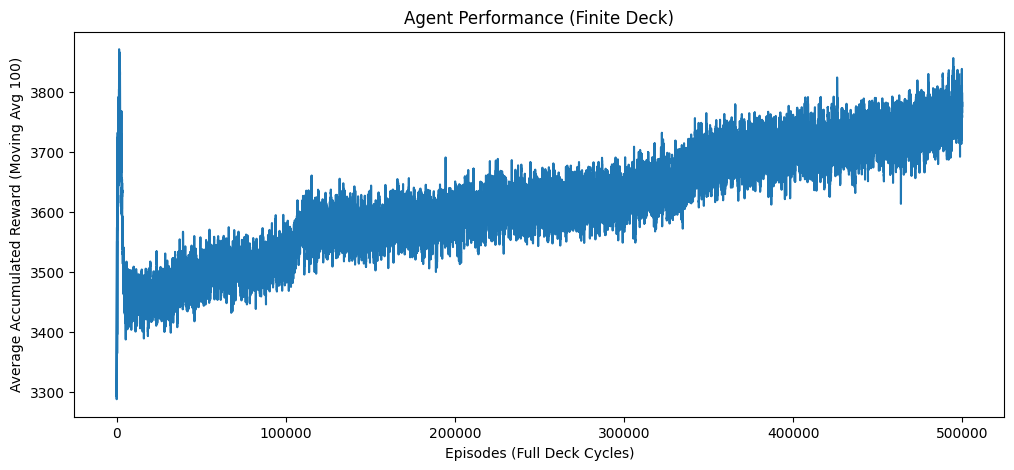

In [31]:
def moving_average(a, n=100):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

plt.figure(figsize=(12, 5))
plt.plot(moving_average(stats["rewards"]))
plt.title("Agent Performance (Finite Deck)")
plt.xlabel("Episodes (Full Deck Cycles)")
plt.ylabel("Average Accumulated Reward (Moving Avg 100)")
plt.show()